In [1]:
import glob 
from pathlib import Path
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
PATH = r'/Users/peaceforlives/Documents/Projects/cyberbullying/data'
PATH_data = Path(PATH)
path_infile = Path.joinpath(PATH_data, 'geotagged_tweets/geotagged_tweets.json')

In [3]:
# import tweets with timezone info
data = pd.read_json(path_infile, lines=True)
data.head()

,id,full_tweet,timezone,localtime,state
0,1159142476520673281,devote your energy to something greater than y...,America/Los_Angeles,2019-08-07 09:41:16 PDT-0700,Oregon
1,1159221398172102656,https://t.co/dcgfsfxogy operation #dropoutjeep...,America/Detroit,2019-08-07 17:54:53 EDT-0400,Michigan
2,1159247564081979392,performing live at @biglumusic \notg_fashawn b...,America/New_York,2019-08-07 19:38:51 EDT-0400,Florida
3,1159434756318269441,✔🆓️ parent workshop sat 8/10 - learn about o...,America/New_York,2019-08-08 08:02:41 EDT-0400,Florida
4,1159556148153864192,#repost @mjcsolutions\n• • • • •\nthis offer i...,America/Los_Angeles,2019-08-08 13:05:03 PDT-0700,California


In [4]:
data['localtime'] = pd.to_datetime(data['localtime'])
data['date'] = [i.date() for i in data['localtime']]
data['time'] = [i.time() for i in data['localtime']]
data['hour'] = [i.hour for i in data['localtime']]
data['day'] = [i.day for i in data['localtime']]
data['wkday'] = [i.weekday() for i in data['localtime']]
# data.set_index('localtime', inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          268 non-null    int64 
 1   full_tweet  268 non-null    object
 2   timezone    268 non-null    object
 3   localtime   268 non-null    object
 4   state       268 non-null    object
 5   date        268 non-null    object
 6   time        268 non-null    object
 7   hour        268 non-null    int64 
 8   day         268 non-null    int64 
 9   wkday       268 non-null    int64 
dtypes: int64(4), object(6)
memory usage: 21.1+ KB


2020-02-26


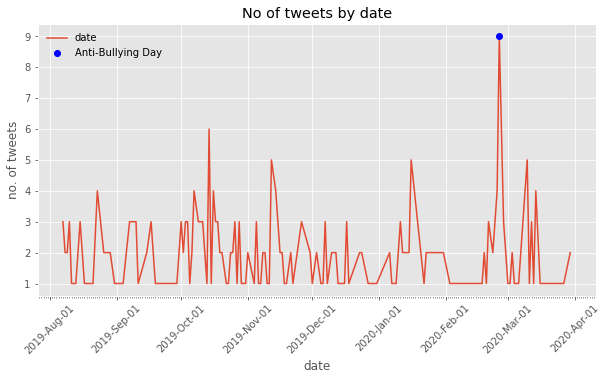

In [5]:
n_tweets = data['date'].groupby(data['date']).count()
x = list(n_tweets.index)
y = n_tweets.values
y_max = y.max()
x_max = x[np.argmax(y)]
print(x_max)

# years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
days = mdates.DayLocator()  # every month
years_fmt = mdates.DateFormatter('%Y-%b-%d')

plt.rcParams['figure.figsize'] = [10, 5]
plt.style.use('ggplot')
fig = plt.figure()
ax = fig.add_subplot(1,1,1)  

plt.plot(n_tweets)
plt.plot(x_max, y_max, 'ro', c='b', label='Anti-Bullying Day')
plt.xlabel("date")
plt.ylabel("no. of tweets")
plt.title("No of tweets by date")
plt.xticks(rotation=45)

# ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(days)
plt.legend(loc='upper left', frameon=False)
plt.savefig('date.pdf', bbox_inches='tight')
# ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=15))   #to get a tick every 15 minutes
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M')) 



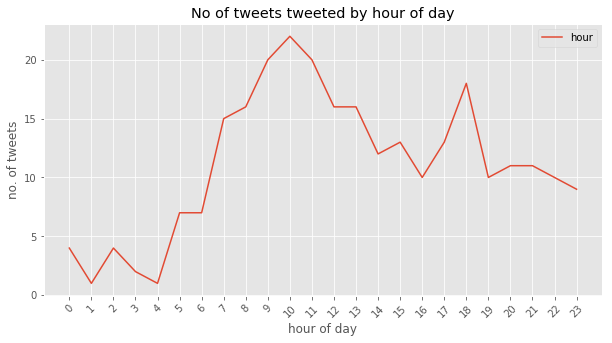

In [220]:
ntweet_hr = data['hour'].groupby(data['hour']).count()
plt.rcParams['figure.figsize'] = [10, 5]
plt.style.use('ggplot')
fig = plt.figure()
ax = fig.add_subplot(1,1,1)  

plt.plot(ntweet_hr)

plt.xlabel("hour of day")
plt.ylabel("no. of tweets")
plt.title("No of tweets tweeted by hour of day")
plt.xticks(ntweet_hr.index,rotation=45)
plt.legend()
plt.savefig('hrday.pdf',bbox_inches='tight')

# ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=15))   #to get a tick every 15 minutes
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M')) 


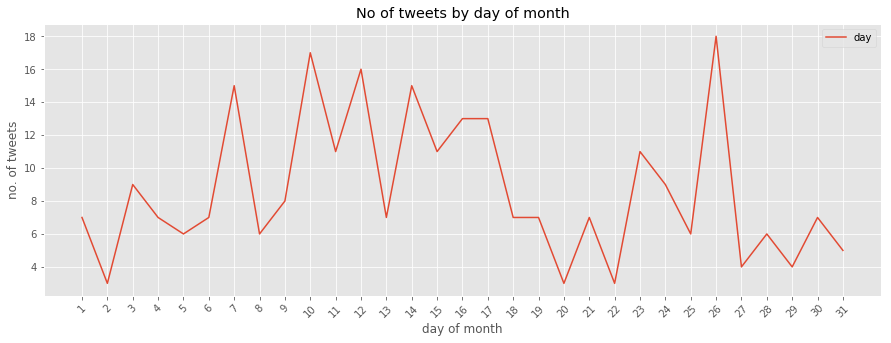

In [221]:
ntweet_mday = data['day'].groupby(data['day']).count()
plt.rcParams['figure.figsize'] = [15, 5]
plt.style.use('ggplot')
fig = plt.figure()
ax = fig.add_subplot(1,1,1)  

plt.plot(ntweet_mday)

plt.xlabel("day of month")
plt.ylabel("no. of tweets")
plt.title("No of tweets by day of month")
plt.xticks(ntweet_mday.index,rotation=45)
plt.legend()
plt.savefig('mthday.pdf',bbox_inches='tight')

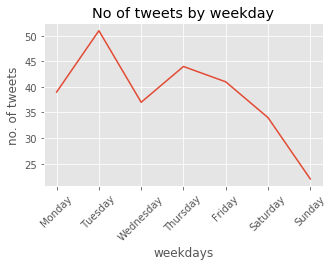

In [222]:
ntweet_wkday = data['wkday'].groupby(data['wkday']).count()
ntweet_wkday.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']

plt.rcParams['figure.figsize'] = [5, 3]
plt.style.use('ggplot')
fig = plt.figure()
ax = fig.add_subplot(1,1,1)  

plt.plot(ntweet_wkday)

plt.xlabel("weekdays")
plt.ylabel("no. of tweets")
plt.title("No of tweets by weekday")
plt.xticks(ntweet_wkday.index,rotation=45)
plt.savefig('wkday.pdf',bbox_inches='tight')